# Quantum Teleportation

## The Quantum Teleportation Protocol

Quantum Teleportation is a way of transmitting a qubit from a sender to a receiver without physically transferring it. The term 'teleportation' here does NOT mean that matter disappears and reappears elsewhere. Instead, it is referring to the transfer of quantum information - the state of a qubit. 

In essence, the sender and receiver share an entangled qubit state (known as an e-bit). By performing some operations and sending two classical bits of information, the sender allows the receiver to be able to 'reconstruct' the original quantum state exactly. This is quantum teleportation.

In this notebook we will label the sender as 'Raees' and the receiver as 'Inayat'.

***Understanding Entanglement***

Before we see the quantum teleportation protocol we need to understand the concept of entanglement in quantum computing. That is, a multi-qubit state is entangled if and only if it cannot be written as a tensor product of individual qubit states. Formally,

$$
|\psi\rangle \neq |a\rangle \otimes |b\rangle
$$

That is, there do not exist single-qubit states $|a\rangle$ and $|b\rangle$ such that their tensor product equals $|\psi\rangle$. If such states do exist, the state is said to be separable (not entangled). The positive Bell State

$$
|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$

is entangled because it cannot be factorized as $|a\rangle\otimes |b\rangle$. Measuring one qubit instantly determines the outcome of the other, even though each qubit individually is in an indeterminate superposition.
$$


***The Protocol***

Raees wants to send the qubit $Q$ to Inayat. Both Raees and Inayat also share an e-bit $(R,I)$. The e-bit $(R,I)$ is in the positive Bell state at the start of the protocol. 

1. Raees begins by performing a controlled-NOT operation on $R$ with $Q$ being the control and $R$ being the target. Then Raees performs a Hadamard operation on $Q$.

2. Raees then measures both $R$ and $Q$ and sends the outcomes to Inayat. Let's say the classical outcomes of $R$ and $Q$ are $a$ and $b$ respectively.

3. Upon receiving $a$ and $b$ from Raees, Inayat will perform operations on these bits depending on the values of $a$ and $b$. If $a=1$, then Inayat performs the $X$ operation on his qubit $I$. If $b=1$, then Inayat performs the $Z$ operation on his qubit $I$.

So, how do we visualize this as a quantum circuit? We will start by implementing this quantum algorithm in Qiskit.

***Qiskit implementation***

We have 3 qubits: Q, R and I so we will create 3 quantum registers and 1 classical register with 3 bits:

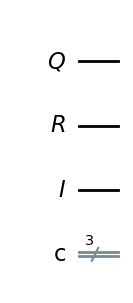

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import CXGate, HGate, XGate, ZGate

CNOT = CXGate()
H = HGate()
X = XGate()
Z = ZGate()

Q = QuantumRegister(1, 'Q') # Qubit to be teleported
R = QuantumRegister(1, 'R') # Raees' qubit (part of entangled pair)
I = QuantumRegister(1, 'I') # Inayat's qubit (part of entangled pair)
c = ClassicalRegister(3, 'c')

qc = QuantumCircuit(Q, R, I, c)
qc.draw('mpl')

Since Raees and Inayat share an entangled pair of qubits, we can create a Bell state between qubits $R$ and $I$. This can be done by applying a Hadamard gate to qubit R followed by a $CNOT$ gate with control qubit $R$ and target qubit $I$. The circuit now looks like this:

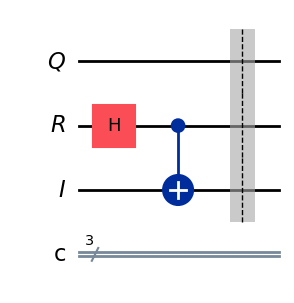

In [4]:
qc.append(H, [R])
qc.append(CNOT, [R, I])
qc.barrier()
qc.draw('mpl')

This has created the positive Bell state which is an entangled state and represents the e-bit that Raees and Inayat share. Now we will show step 1 of the protocol in Qiskit. That is, the actions Raees performs on his qubit $Q$ and e-bit $R$.

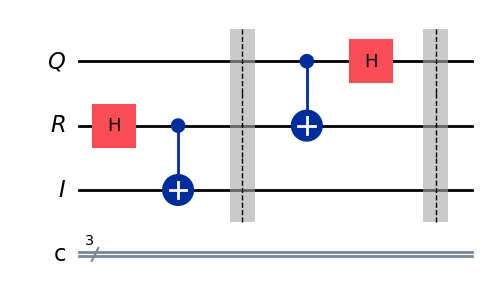

In [5]:
qc.append(CNOT, [Q, R])
qc.append(H, [Q])
qc.barrier()
qc.draw('mpl')

In step 2, he then measures both of these qubits and sends the classical outcomes to Inayat.

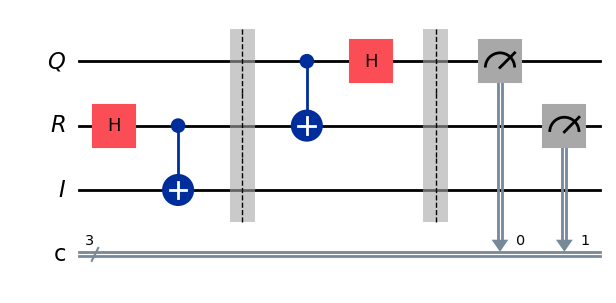

In [6]:
qc.measure(Q, c[0])
qc.measure(R, c[1])
qc.draw('mpl')

Finally, in step 3, Inayat performs his actions depending on the values of $a$ and $b$ so this is where we will use the 'if' functions in Qiskit; the quantum computer will only execute an operation based on the conditions we specify. In this case, if $a=1$ then Inayat perfroms an $X$ gate and if $b=1$ then Inayat performs a $Z$ gate.

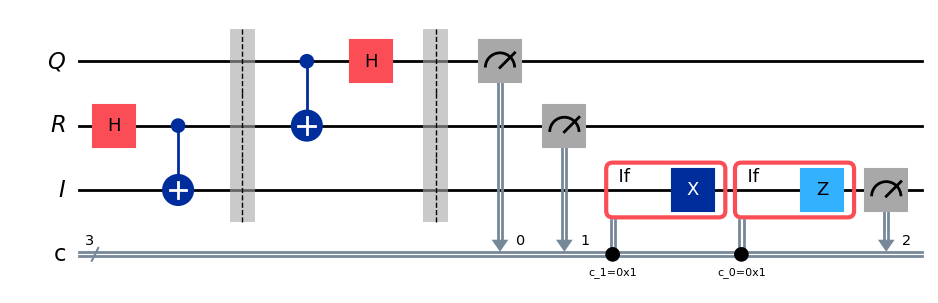

In [7]:
with qc.if_test((c[1], 1)):
    qc.append(X, [I]) # If a=1, apply X gate
with qc.if_test((c[0], 1)):
    qc.append(Z, [I]) # If b=1, apply Z gate
qc.measure(I, c[2])
qc.draw('mpl')

The image above is the quantum teleportation circuit. But how do we know it worked? Since we are using Qiskit, all the quantum registers we create as part of a quantum circuit are deliberately initialized to the state $\ket 0$. Therefore, Raees' qubit $Q$ is just this: $\ket 0$.

As we outlined before, during teleportation, the goal is for Inayat's qubit $I$ to be in the exact same quantum state as Raees' message qubit $Q$ we had at the start. Hence, if teleportation worked perfectly, the leading classic bit (left-most bit) should always be $0$. Let's run this circuit on a simulator and see what results we get; we will run it 1024 times. We will view the results as a histogram, and since histograms only show what we have 'measured' that is why we make sure to measure the final qubit $I$ in the circuit as well.

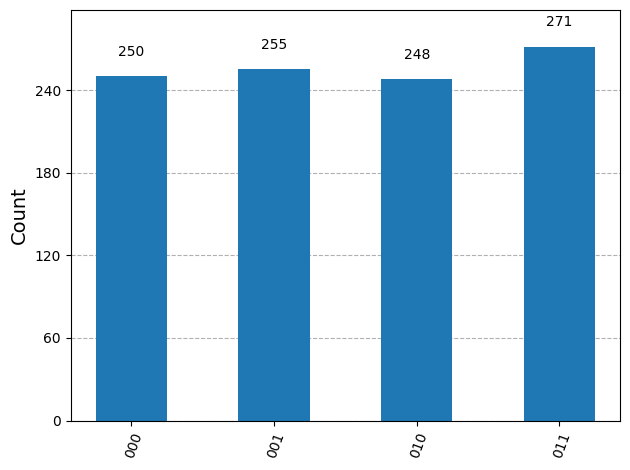

In [8]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

The results from the executed cicuit are always $0$ so we can coclude that the quantum teleportation protocol was successful.

## Fidelity experiments (precision of teleportation)

We have only teleported the $\ket 0$ state so let's take it a step further by teleporting multiple different input states ($\ket 1$, $\ket +$, $\ket -$, $\ket i$). 

We will start with $\ket 1$. To do this we only need to perform a bit flip on Raees' qubit $Q$, so it is in the $\ket 1$ state, before we begin the protocol. We will call this circuit $Q1$.

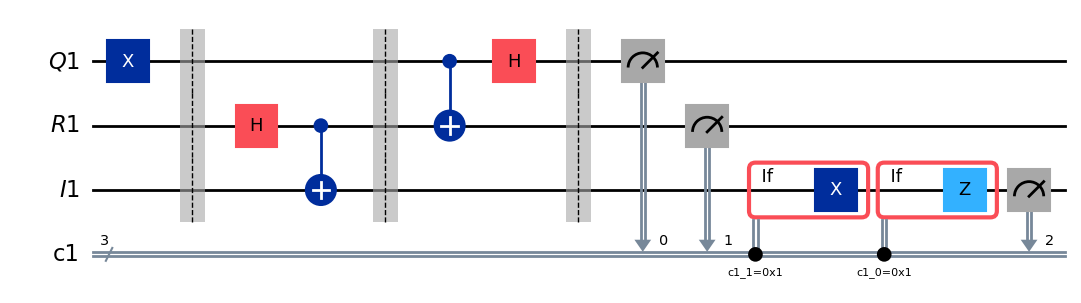

In [9]:
Q1 = QuantumRegister(1, 'Q1') # Qubit to be teleported
R1 = QuantumRegister(1, 'R1') # Raees' qubit (part of entangled pair)
I1 = QuantumRegister(1, 'I1') # Inayat's qubit (part of entangled pair)
c1 = ClassicalRegister(3, 'c1')
qc_1 = QuantumCircuit(Q1, R1, I1, c1)

qc_1.append(X, [Q1]) # Prepare |1> state on Q
qc_1.barrier()
qc_1.append(H, [R1])
qc_1.append(CNOT, [R1, I1])
qc_1.barrier()
qc_1.append(CNOT, [Q1, R1])
qc_1.append(H, [Q1])
qc_1.barrier()
qc_1.measure(Q1, c1[0])
qc_1.measure(R1, c1[1])
with qc_1.if_test((c1[1], 1)):
    qc_1.append(X, [I1]) # If a=1, apply X gate
with qc_1.if_test((c1[0], 1)):
    qc_1.append(Z, [I1]) # If b=1, apply Z gate
qc_1.measure(I1, c1[2])
qc_1.draw('mpl')

Again, to verify that teleportation was successful we will view the results as a histogram where we have run the circuit 1024 times. We should expect the leading bit (left-most bit) to be $1$ for all outcomes.

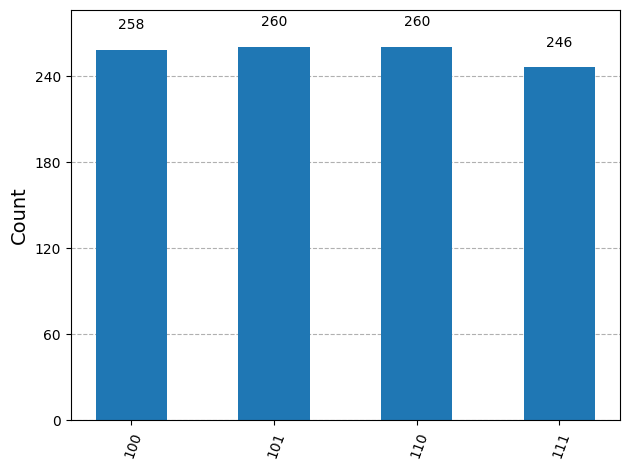

In [10]:
result = AerSimulator().run(qc_1).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

As shown above, teleportation is successful when we initialized the first qubit $Q$ to $\ket 1$. Now let's try initializing it to $\ket +$ instead; we simply replace the $X$ gate with the Hadamard gate since $H\ket 0=\frac{1}{\sqrt{2}}(\ket 0+\ket 1)=\ket +$. We will call this circuit $Q2$.

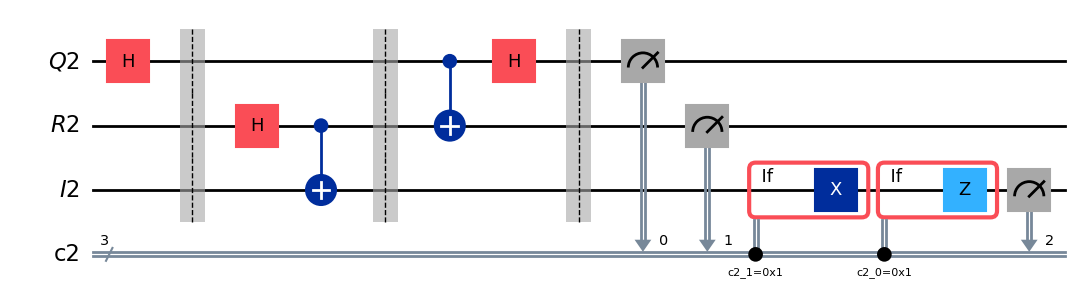

In [11]:
Q2 = QuantumRegister(1, 'Q2') # Qubit to be teleported
R2 = QuantumRegister(1, 'R2') # Raees' qubit (part of entangled pair)
I2 = QuantumRegister(1, 'I2') # Inayat's qubit (part of entangled pair)
c2 = ClassicalRegister(3, 'c2')
qc_2 = QuantumCircuit(Q2, R2, I2, c2)

qc_2.append(H, [Q2]) # Prepare |+> state on Q
qc_2.barrier()
qc_2.append(H, [R2])
qc_2.append(CNOT, [R2, I2])
qc_2.barrier()
qc_2.append(CNOT, [Q2, R2])
qc_2.append(H, [Q2])
qc_2.barrier()
qc_2.measure(Q2, c2[0])
qc_2.measure(R2, c2[1])
with qc_2.if_test((c2[1], 1)):
    qc_2.append(X, [I2]) # If a=1, apply X gate
with qc_2.if_test((c2[0], 1)):
    qc_2.append(Z, [I2]) # If b=1, apply Z gate
qc_2.measure(I2, c2[2])
qc_2.draw('mpl')

Now we display the results on a histogram after running the circuit 1024 times.

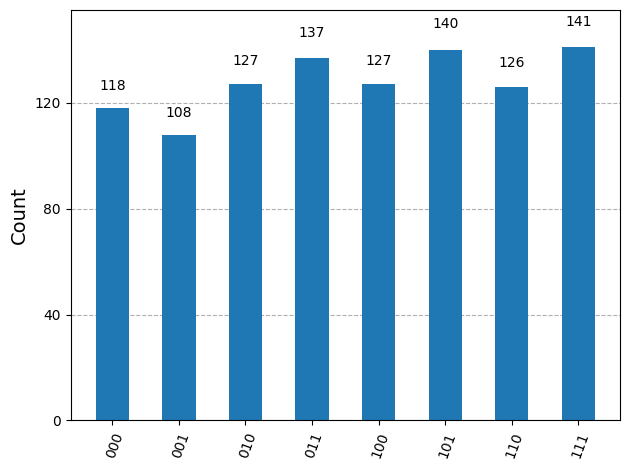

In [12]:
result = AerSimulator().run(qc_2).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

Interestingly, this time we have 8 possible outcomes. You may be thinking: the leading bits are $0$'s and $1$'s so teleportation must have failed? Actually, the protocol was successful yet again. This is because Raees' initial qubit $Q$, which is initialized to $\ket + = \frac{1}{\sqrt{2}}(\ket 0+\ket 1)$, is a single-qubit superposition so, when measured classically, yields $0$ or $1$ with equal probability. In essence, all of the outcomes above are just the combined outcomes of when we ran the circuit for $\ket 0$ and $\ket 1$ separately.

## Noise model

Now we will run the first teleportation circuit using the Aer noise model. Noise models are used to help us see the noise effects that cause errors in quantum circuits.

management.get:WARNING:2025-11-15 20:31:25,066: Loading default saved account
qiskit_runtime_service.__init__:WARNING:2025-11-15 20:31:29,509: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: raees-inayat-qc. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-15 20:31:29,510: Using instance: raees-inayat-qc, plan: open


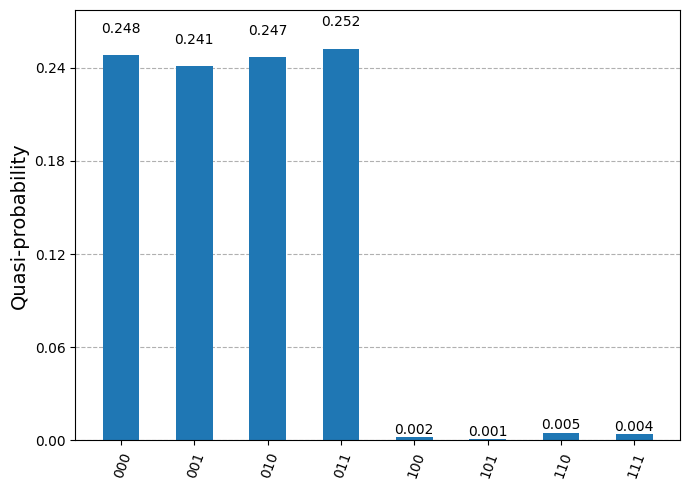

In [14]:
from qiskit_aer.noise import NoiseModel, depolarizing_error, thermal_relaxation_error
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_distribution

service = QiskitRuntimeService()
backend = service.backend(name='ibm_fez')

transpiled_qc = transpile(qc,backend)

noise_model = NoiseModel.from_backend(backend)
# get coupling map from the backend
coupling_map = backend.configuration().coupling_map
# get basis gates from the backend
basis_gates = noise_model.basis_gates
# get the aer simulator to apply the noise model
noisy_simulator = AerSimulator(noise_model=noise_model)
# execute the circuit on the noisy simulator backend
result = noisy_simulator.run(transpiled_qc,
                             coupling = coupling_map,
                             basis_gates=basis_gates,
                             noise_model=noise_model).result()
# obtain and print results
counts = result.get_counts()
plot_distribution(counts)

As you can see we don't obtain results which are correct and show teleportation did not work. In some cases we get results with a leading 1. In our first circuit we already know that since all qubits are initialized to $\ket 0$ we should be teleporting that qubit and so we end up with only a leading 0. However, with this noise model, we can see 1 being measured and we know this is wrong. But what is noise?

Mathematically, we should never obtain meaasurements with a leading 1 for this circuit. Mathematically, a qubit evolves exactly according to:

$$
\ket\psi\rightarrow U\ket\psi
$$

for every gate $U$. However, physical qubits do not behave exactly like mathematical qubits. There are different types of physical qubits such as superconducting qubits, ion trap qubits, photonic qubits etc. They constantly get disturbed by their environment. So instead of a clean evolution of the quantum state, it is instead a noisy process:

$$
\ket\psi\rightarrow\mathcal{E}\ket\psi
$$

where $\mathcal{E}$ is a noisy (imperfect) transformation. So, ultimately noise is unwanted physical interactions that spoil the quantum state.